## Library importing 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import nltk
from nltk.corpus import stopwords

from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
                            plot_confusion_matrix, classification_report

In [2]:
nlp = spacy.load('en_core_web_sm')

## Data Upload

### Training Data

In [3]:
df = pd.read_csv('train.csv') # using panda to read the csv file
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [4]:
df.set_index('id').head() # making the Id column the index

,text,author
id,,
id26305,"This process, however, afforded me no means of...",EAP
id17569,It never once occurred to me that the fumbling...,HPL
id11008,"In his left hand was a gold snuff box, from wh...",EAP
id27763,How lovely is spring As we looked from Windsor...,MWS
id12958,"Finding nothing else, not even gold, the Super...",HPL


### Test Data

In [5]:
Test = pd.read_csv('test.csv') # using panda to read the csv file
Test.set_index('id').head() # making the Id column the index
print(Test.shape)
Test.head()

(8392, 2)


,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...


## Exploratory Data Analysis (EDA)

In [6]:
# Looking at the shape of the data 
print("the shape of the DataFrame is: ", df.shape)
print("the data have this number of row ", df.shape[0])
print("the data have this number of columns ", df.shape[1])

the shape of the DataFrame is:  (19579, 3)
the data have this number of row  19579
the data have this number of columns  3


In [7]:
# lookig for missing value in the dataframe
print ('the totla number of missing values are ',df.isnull().sum().sum())

the totla number of missing values are  0


In [8]:
# information abour the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19579 entries, 0 to 19578
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      19579 non-null  object
 1   text    19579 non-null  object
 2   author  19579 non-null  object
dtypes: object(3)
memory usage: 459.0+ KB


#### the destribtion of authore in the data 

In [9]:
author_destribution = df['author'].value_counts(normalize=True)
author_destribution

EAP    0.403494
MWS    0.308698
HPL    0.287808
Name: author, dtype: float64

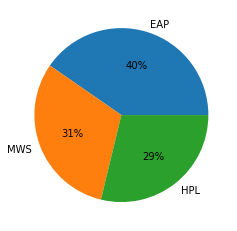

In [10]:
# pie chart of the author distribution
author_Label = author_destribution.index

plt.pie(author_destribution, labels = author_Label, autopct='%1.0f%%');
plt.show()

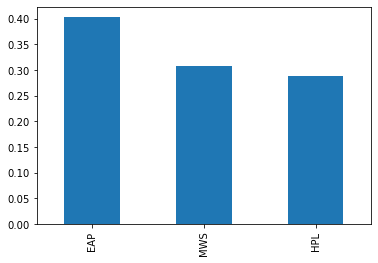

In [11]:
# bar chart of the author distribution
author_destribution.plot(kind='bar')
plt.show()

## Data Processing

#### Remove punctuation

In [12]:
def remove_punctuation(str):
    """
    this function take in a sectence
    this function remove punctuation.
    it return a sentens with no punctuation
    """
    str = str.lower() # Convert all characters to lowercase
    sent = nlp(str)
    token_sentence =[]
    for token in sent: # this loop will go over the token in the sentence
        if token.is_punct == False: # check is the token is a punctuation
            token_sentence.append(token) # add the not punctuation token to the list

    # rewrite the sentence with no punctuation
    new_sentencs = ' '.join(token.text for token in token_sentence)
    
    return new_sentencs

In [13]:
# Creat a columns with sentence with no punctuation
df['text_no_punctuation'] = df['text'].apply(remove_punctuation)

# TEst DATASET
Test['text_no_punctuation'] = Test['text'].apply(remove_punctuation)

#### Tokenization

In [14]:
def tokenization(str):
    """
    this function take in a sectence
    this function tokeinze the sentens uing spacy
    return a list of token
    """
    sent =  nlp(str)
    tokenization_list =[]
    for token in sent:
        tokenization_list.append(token) # append the tokens in the new list
    
    return  tokenization_list

#### Remove stopwords

In [15]:
def stopwords_remove(str):
    """
    this function take in a sentence
    this function remove all the stopwrods in the list
    return a list of token with no stop words
    """ 
    str_list = tokenization(str)
    no_stopword_list = []
    for word in str_list:
        if word.is_stop == False: # checking if the word is a stop ord or not
            no_stopword_list.append(word) # append all non stop words in the sentens
    
    return no_stopword_list

#### Stemming 

In [16]:
from nltk.stem.snowball import SnowballStemmer
def Stemming(str_list):
    """
    this function take in a list
    this function stemm the token
    it return a token of a stemm 
    """
    stemming = SnowballStemmer(language='english')
    steeming_token =[]
    for word in str_list:
        stem = stemming.stem(word.text)
        steeming_token.append(stem)
    
    # rewrite the sentence with steem word
    new_sentencs = ' '.join(token for token in steeming_token)
    
    return new_sentencs

#### Lemmatizing

In [17]:
# def lemmatizing(str_list):
#     """
#     this function take in a list
#     this function lemmatizing the token
#     it return a list of a lemma text
#     """
#     steeming_lemma =[]
#     for word in str_list:
#         lemma = word.lemma_
#         steeming_lemma.append(lemma)
    
#     # rewrite the sentence with steem word
#     new_sentencs = ' '.join(token for token in steeming_lemma)
    
#     return new_sentencs

### Final pre-processing

In [18]:
def final_preprocess(string):
    """
    take in a stering
    this function alpply 
    return a clean sentence
    """
    final_pre_process_stemm = Stemming(stopwords_remove(string))
#     final_pre_process_lemma = lemmatizing(stopwords_remove(string))
    return final_pre_process_stemm 

In [19]:
# Creat two ne colum stemming text and lemma text
df['text_stemming']= df['text_no_punctuation'].apply(final_preprocess)

# TEST DATASET
Test['text_stemming']= Test['text_no_punctuation'].apply(final_preprocess)

In [20]:
# Test dataset
Test.head()

,id,text,text_no_punctuation,text_stemming
0,id02310,"Still, as I urged our leaving Ireland with suc...",still as i urged our leaving ireland with such...,urg leav ireland inquietud impati father thoug...
1,id24541,"If a fire wanted fanning, it could readily be ...",if a fire wanted fanning it could readily be f...,fire want fan readili fan newspap govern grew ...
2,id00134,And when they had broken down the frail door t...,and when they had broken down the frail door t...,broken frail door found clean pick human skele...
3,id27757,While I was thinking how I should possibly man...,while i was thinking how i should possibly man...,think possibl manag actual tumbl head roll ste...
4,id04081,I am not sure to what limit his knowledge may ...,i am not sure to what limit his knowledge may ...,sure limit knowledg extend


#### Feature Engineering

In [21]:
# creat a column of the word lenth
df['text_lenght'] = df['text_no_punctuation'].apply(lambda x: len(x))
# creat a column of the number of words in a text
df['text_word_count'] = df['text_no_punctuation'].apply(lambda x: len(x.split()))

In [22]:
def avg_word_len(x):
    """
    take in a sentence or text
    calculate the average of the words in the text
    return a int (the average)
    """
    words = x.split() # to only count the word no spaces
    word_lenght = 0
    for word in words:
        word_lenght = word_lenght + len(word) # count the lenght of all the word in the sentenc
    words_avg = word_lenght/len(words)
    return words_avg

# creat a coulm of the average numbe of words in a text
df['text_avg_word_lenght'] = df['text_no_punctuation'].apply(avg_word_len)


## Exploratory Data Analysis (EDA)

#### Text Length, word count, and Average Words Lenght distribution

C:\Users\mosae\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


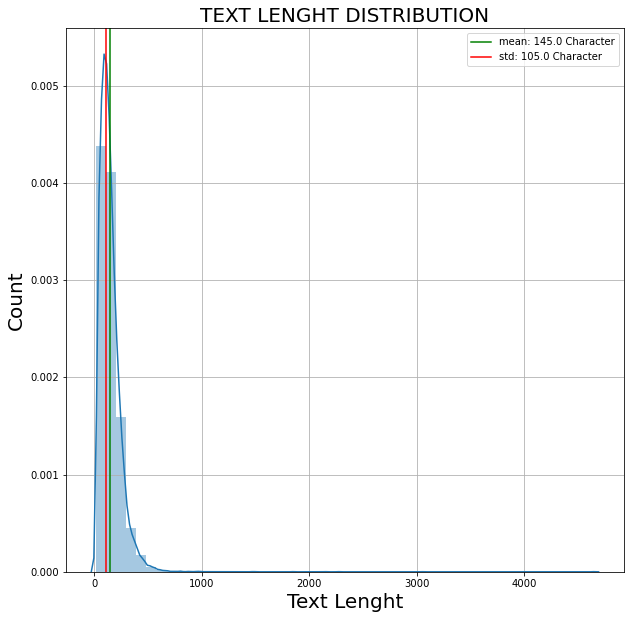

In [23]:
# plot the text lenght distribution
plt.figure(figsize=(10,10))
sns.distplot(df['text_lenght'])
plt.xlabel('Text Lenght', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title("TEXT LENGHT DISTRIBUTION", fontsize=20)
# show the mean on the plot
mean= df['text_lenght'].mean()
plt.axvline(x=mean,color='green',label=f'mean: {round(mean,0)} Character')
# show the std on the plot
std =df['text_lenght'].std()
plt.axvline(x=std,color='red',label=f'std: {round(std,0)} Character')
plt.grid()
plt.legend()
plt.show()

C:\Users\mosae\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


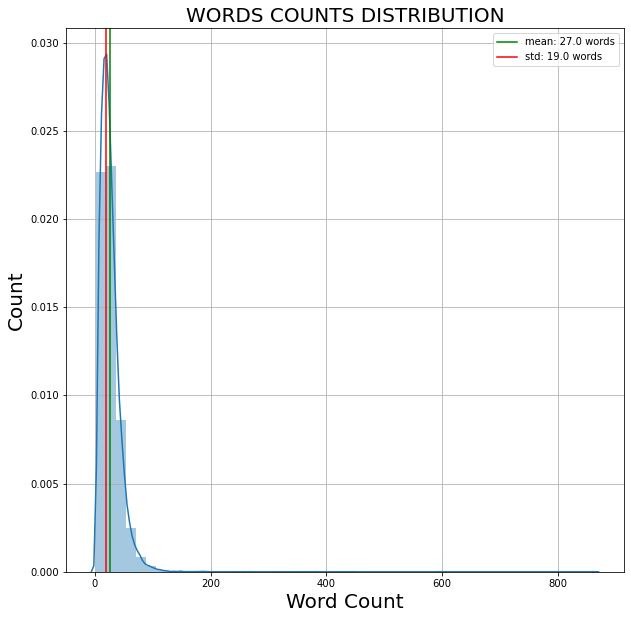

In [24]:
# plot the word count distribution
plt.figure(figsize=(10,10))
sns.distplot(df['text_word_count'])
plt.xlabel('Word Count', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title("WORDS COUNTS DISTRIBUTION", fontsize=20)
# show the mean on the plot
mean= df['text_word_count'].mean()
plt.axvline(x=mean,color='green',label=f'mean: {round(mean,0)} words')
# show the std on the plot
std =df['text_word_count'].std()
plt.axvline(x=std,color='red',label=f'std: {round(std,0)} words')
plt.grid()
plt.legend()
plt.show()

C:\Users\mosae\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


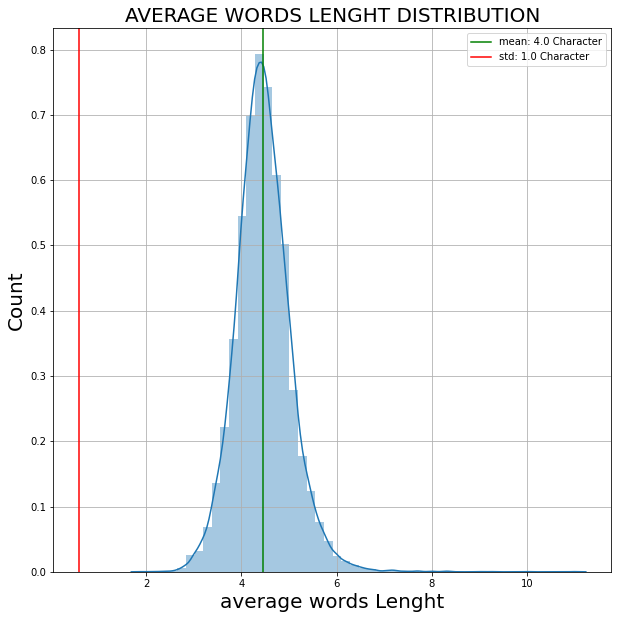

In [25]:
# plot the average word lenght distribution
plt.figure(figsize=(10,10))
sns.distplot(df['text_avg_word_lenght'])
plt.xlabel('average words Lenght', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title("AVERAGE WORDS LENGHT DISTRIBUTION", fontsize=20)
# show the mean on the plot
mean= df['text_avg_word_lenght'].mean()
plt.axvline(x=mean,color='green',label=f'mean: {round(mean,0)} Character')
# show the std on the plot
std =df['text_avg_word_lenght'].std()
plt.axvline(x=std,color='red',label=f'std: {round(std,0)} Character')
plt.grid()
plt.legend()
plt.show()

#### vectorizing text via term frequencies (TF) 

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
def most_frequent_words(x ,n):
    """
    this function takes in a list
    do a count Vectorizer or term frequencies
    return a the n number of most frequencies words"""
    TF_CV = CountVectorizer(max_df = 0.95, min_df=2).fit(x)
    vector = TF_CV.vocabulary_.items()
    words_freq = []
    for wor in vector:
        words_freq.append(wor)
    words_freq = sorted(words_freq, reverse=True)
    return words_freq[:n]

In [28]:
most_80_freq_words = most_frequent_words(df['text_stemming'],80)

In [29]:
text_list =[]
# creat a list of the mosrt frequent words
for word in most_80_freq_words:
    text_list.append(word[0])

# join the most frequent words to creat a sentens for wordcloud
text_sentens = " ".join(token for token in text_list)

#### wordcloud

In [30]:
from wordcloud import WordCloud

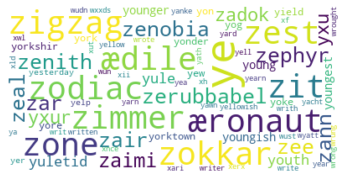

In [31]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_sentens)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### vectorizing text via inverse document frequencies (TF-IDF)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
# Creating Sparse Matrix
vectorize = TfidfVectorizer( max_df = 0.95, min_df = 2, stop_words='english')
tf_idf_vectorization = vectorize.fit_transform(df['text_stemming'])

tf_idf_array = tf_idf_vectorization.toarray()

df_tf_idf = pd.DataFrame(tf_idf_array, columns=vectorize.get_feature_names())
df_tf_idf.index=df.index
df_tf_idf.head()

,aback,abandon,abaout,abas,abash,abat,abbey,abbrevi,abdic,abdul,...,zerubbabel,zest,zigzag,zimmer,zit,zodiac,zokkar,zone,ædile,æronaut
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.291841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Topic Modelling with LDA and NMF

#### Non-negative Matrix Factorization

In [34]:
from sklearn.decomposition import NMF

In [35]:
nmf_model = NMF(random_state = 42, n_components=10)
nmf_model.fit(tf_idf_vectorization)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=10, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [36]:
for index, topic in enumerate(nmf_model.components_):
    print(f"THE TOP 10 WORDS FOR TOPIC #{index}")
    print([vectorize.get_feature_names()[i] for i in topic.argsort()[-10:]],'\n\n')

THE TOP 10 WORDS FOR TOPIC #0
['place', 'feel', 'natur', 'word', 'appear', 'mind', 'fear', 'death', 'thought', 'life'] 


THE TOP 10 WORDS FOR TOPIC #1
['heard', 'dear', 'yes', 'come', 'sir', 'mean', 'littl', 'let', 'dupin', 'said'] 


THE TOP 10 WORDS FOR TOPIC #2
['old', 'told', 'world', 'speak', 'like', 'knew', 'men', 'strang', 'earth', 'thing'] 


THE TOP 10 WORDS FOR TOPIC #3
['affect', 'tender', 'sorrow', 'passion', 'feel', 'happi', 'beauti', 'hope', 'heart', 'love'] 


THE TOP 10 WORDS FOR TOPIC #4
['anim', 'dead', 'seen', 'live', 'year', 'god', 'young', 'great', 'old', 'man'] 


THE TOP 10 WORDS FOR TOPIC #5
['return', 'space', 'spent', 'come', 'short', 'mean', 'hour', 'year', 'long', 'time'] 


THE TOP 10 WORDS FOR TOPIC #6
['expect', 'ye', 'repli', 'strang', 'world', 'believ', 'god', 'tell', 'shall', 'know'] 


THE TOP 10 WORDS FOR TOPIC #7
['morn', 'remain', 'arriv', 'return', 'sleep', 'came', 'hour', 'pass', 'night', 'day'] 


THE TOP 10 WORDS FOR TOPIC #8
['enter', 'left',

In [37]:
df['Topic_NMF'] = nmf_model.transform(tf_idf_vectorization).argmax(axis =1)

####  Latent Dirichlet Allocation (LDA)

In [38]:
from sklearn.decomposition import LatentDirichletAllocation

In [39]:
TF_CV = CountVectorizer(max_df = 0.95, min_df=2)
dtm = TF_CV.fit_transform(df['text_stemming'])
LED = LatentDirichletAllocation(n_components=10, random_state=42).fit(dtm)


In [40]:
for index, topic in enumerate(LED.components_):
    print(f"THE TOP 10 WORDS FOR TOPIC #{index}")
    print([TF_CV.get_feature_names()[i] for i in topic.argsort()[-10:]],'\n\n')

THE TOP 10 WORDS FOR TOPIC #0
['appear', 'far', 'black', 'door', 'wall', 'feet', 'littl', 'face', 'man', 'water'] 


THE TOP 10 WORDS FOR TOPIC #1
['appear', 'natur', 'spirit', 'love', 'time', 'found', 'death', 'day', 'earth', 'life'] 


THE TOP 10 WORDS FOR TOPIC #2
['fear', 'life', 'happi', 'eye', 'hope', 'said', 'heart', 'thought', 'feel', 'love'] 


THE TOP 10 WORDS FOR TOPIC #3
['heard', 'step', 'mere', 'have', 'room', 'place', 'point', 'natur', 'time', 'great'] 


THE TOP 10 WORDS FOR TOPIC #4
['book', 'told', 'time', 'left', 'like', 'tell', 'old', 'come', 'year', 'thing'] 


THE TOP 10 WORDS FOR TOPIC #5
['hour', 'come', 'light', 'time', 'street', 'dark', 'day', 'came', 'hous', 'night'] 


THE TOP 10 WORDS FOR TOPIC #6
['hideous', 'form', 'horror', 'certain', 'think', 'strang', 'like', 'thing', 'know', 'man'] 


THE TOP 10 WORDS FOR TOPIC #7
['enter', 'reason', 'adrian', 'father', 'mind', 'man', 'raymond', 'door', 'hous', 'open'] 


THE TOP 10 WORDS FOR TOPIC #8
['mr', 'place', 

In [41]:
df['Topic_LED'] = nmf_model.transform(tf_idf_vectorization).argmax(axis =1)

In [42]:
df.head()

,id,text,author,text_no_punctuation,text_stemming,text_lenght,text_word_count,text_avg_word_lenght,Topic_NMF,Topic_LED
0,id26305,"This process, however, afforded me no means of...",EAP,this process however afforded me no means of a...,process afford mean ascertain dimens dungeon c...,224,41,4.487805,0,0
1,id17569,It never once occurred to me that the fumbling...,HPL,it never once occurred to me that the fumbling...,occur fumbl mere mistak,70,14,4.071429,0,0
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,in his left hand was a gold snuff box from whi...,left hand gold snuff box caper hill cut manner...,195,36,4.444444,8,8
3,id27763,How lovely is spring As we looked from Windsor...,MWS,how lovely is spring as we looked from windsor...,love spring look windsor terrac sixteen fertil...,202,34,4.970588,3,3
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,finding nothing else not even gold the superin...,find gold superintend abandon attempt perplex ...,170,27,5.333333,9,9


## DATA SPLIT

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_text = df["text_stemming"]
y = df['author']
# test dataset
X_text_test = Test["text_stemming"]

In [45]:
vectorize = TfidfVectorizer( max_df = 0.90, min_df = 1, stop_words='english', max_features =10744)


In [46]:
X = vectorize.fit_transform(X_text)
X_TEST = vectorize.fit_transform(X_text_test)

In [47]:
X_train, X_val, y_train, y_val = train_test_split( X, y, test_size = .2, random_state =42)
print(f"the X_train data shape is {X_train.shape}  --> the y_train data shape is {y_train.shape}")
print(f"the X_val data shape is {X_val.shape}  --> the y_val data shape is {y_val.shape}")
print(f"The Test data set shape {X_TEST.shape}")

the X_train data shape is (15663, 10744)  --> the y_train data shape is (15663,)
the X_val data shape is (3916, 10744)  --> the y_val data shape is (3916,)
The Test data set shape (8392, 10744)


## BaseLine 

In [48]:
print(f"the BaceLine accuracy is, {round(y.value_counts(normalize=True).max(),4)}")

the BaceLine accuracy is, 0.4035


# Model

### Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
DCTree_model = DecisionTreeClassifier()

# Fit the logistic Regression model
DCTree_model.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
# classification score
print(f"the training accuracy is {DCTree_model.score(X_train, y_train)}")
print(f"the val accuracy is {DCTree_model.score(X_val, y_val)}")

the training accuracy is 0.9983400370299432
the val accuracy is 0.6138917262512769


#### Cross_valadation

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
result = cross_val_score(DCTree_model, X, y, cv=5, n_jobs=-2, scoring='accuracy')
# calculate the mean of the scores
estimate = result.mean()

print("the mean acuracy score is ",estimate)

the mean acuracy score is  0.6102967815831046


From the Training accuracy we see that the model if overfitting. we see that our model is better than our baseline accuracy

#### Cross_valadation

              precision    recall  f1-score   support

         EAP       0.64      0.63      0.64      1570
         HPL       0.56      0.58      0.57      1071
         MWS       0.63      0.62      0.62      1275

    accuracy                           0.61      3916
   macro avg       0.61      0.61      0.61      3916
weighted avg       0.61      0.61      0.61      3916



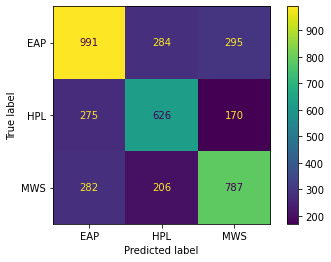

In [54]:
print(classification_report(y_val, DCTree_model.predict(X_val)))
plot_confusion_matrix(DCTree_model, X_val, y_val, values_format = '.0f',)
plt.show()

### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
RF_model = RandomForestClassifier()

RF_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
# classification score
print(f"the training accuracy is {RF_model.score(X_train, y_train)}")
print(f"the val accuracy is {RF_model.score(X_val, y_val)}")

the training accuracy is 0.9983400370299432
the val accuracy is 0.7055669050051072


we can see that random forest did better but there is still and overfitting

#### Cross_valadation

In [58]:
result = cross_val_score(RF_model, X, y, cv=5, n_jobs=-2, scoring='accuracy')
# calculate the mean of the scores
estimate = result.mean()

print("the mean acuracy score is ",estimate)

the mean acuracy score is  0.7111703630649775


#### confusion matrix

              precision    recall  f1-score   support

         EAP       0.69      0.77      0.73      1570
         HPL       0.69      0.67      0.68      1071
         MWS       0.74      0.65      0.69      1275

    accuracy                           0.71      3916
   macro avg       0.71      0.70      0.70      3916
weighted avg       0.71      0.71      0.70      3916



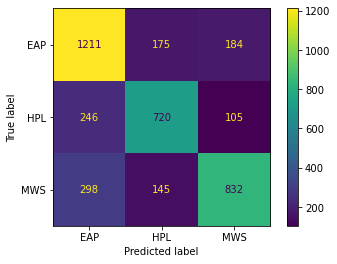

In [59]:
print(classification_report(y_val, RF_model.predict(X_val)))
plot_confusion_matrix(RF_model, X_val, y_val,values_format = '.0f')
plt.show()

## XGBoost

In [60]:
from xgboost import XGBClassifier

In [61]:
XGB_model = XGBClassifier()

XGB_model.fit(X_train, y_train)

C:\Users\mosae\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:31:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [62]:
# classification score
print(f"the training accuracy is {XGB_model.score(X_train, y_train)}")
print(f"the val accuracy is {XGB_model.score(X_val, y_val)}")

the training accuracy is 0.7962714677903339
the val accuracy is 0.6933094994892748


#### Cross_valadation

In [63]:
result = cross_val_score(XGB_model, X, y, cv=5, n_jobs=-2, scoring='accuracy')
# calculate the mean of the scores
estimate = result.mean()

print("the mean acuracy score is ",estimate)

the mean acuracy score is  0.698963456076978


#### confusion matrix

              precision    recall  f1-score   support

         EAP       0.62      0.86      0.72      1570
         HPL       0.75      0.59      0.66      1071
         MWS       0.80      0.57      0.67      1275

    accuracy                           0.69      3916
   macro avg       0.73      0.67      0.68      3916
weighted avg       0.72      0.69      0.69      3916



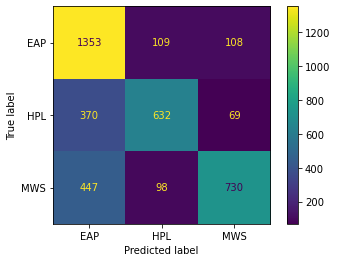

In [64]:
print(classification_report(y_val, XGB_model.predict(X_val)))
plot_confusion_matrix(XGB_model, X_val, y_val,values_format = '.0f',)
plt.show()

### To predict the author of the test dataset i would use the XGBoost model eventhough it's not the model with highest accuracy, it have 69.89% accuracy but it have the least overfitting 

# TEST DATASET PREDICTION

### XGBoost Predicting

In [65]:
y_test_pred = XGB_model.predict(X_TEST)
submission = pd.DataFrame({'author':y_test_pred})

In [66]:
new_test_df = Test.join(submission)
new_test_df.head()

,id,text,text_no_punctuation,text_stemming,author
0,id02310,"Still, as I urged our leaving Ireland with suc...",still as i urged our leaving ireland with such...,urg leav ireland inquietud impati father thoug...,EAP
1,id24541,"If a fire wanted fanning, it could readily be ...",if a fire wanted fanning it could readily be f...,fire want fan readili fan newspap govern grew ...,EAP
2,id00134,And when they had broken down the frail door t...,and when they had broken down the frail door t...,broken frail door found clean pick human skele...,EAP
3,id27757,While I was thinking how I should possibly man...,while i was thinking how i should possibly man...,think possibl manag actual tumbl head roll ste...,EAP
4,id04081,I am not sure to what limit his knowledge may ...,i am not sure to what limit his knowledge may ...,sure limit knowledg extend,EAP
